# MNIST 분류기

* 실습 환경

In [23]:
import tensorflow as tf
import keras

In [24]:
tf.__version__

'1.15.0'

In [25]:
keras.__version__

'2.3.0'

* 텐서플로우 이용

In [1]:
# 패키지
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# 데이터
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

* 케라스 이용

In [3]:
from keras.datasets import mnist
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = mnist.load_data()

## 실습 1

In [5]:
print(len(trainX), len(trainY))

60000 60000


In [6]:
print(len(testX), len(testY))

10000 10000


In [7]:
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

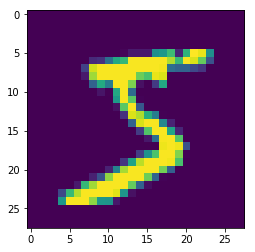

In [9]:
plt.imshow(trainX[0].reshape(28,28))
plt.show()

In [10]:
print(trainY[0])

5


## 실습2

In [11]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

In [12]:
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

In [13]:
trainImages = trainImages.reshape(60000, 28*28)
testImages = testImages.reshape(10000, 28*28)

In [14]:
trainImages = trainImages.astype('float32')/255
testImages = testImages.astype('float32')/255

In [15]:
trainLabels = to_categorical(trainLabels)
testLabels = to_categorical(testLabels)

In [16]:
model = Sequential()
model.add(layers.Dense(16, activation='sigmoid', input_dim=784))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [17]:
# model = Sequential([
#     layers.Dense(16, activation='sigmoid', input_dim=784),
#     layers.Dense(10, activation='softmax')
# ])
# model.summary()

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [19]:
history = model.fit(trainImages, trainLabels, batch_size=1000, epochs=10, verbose=1, validation_split=.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 11us/step - loss: 2.0603 - accuracy: 0.3923 - val_loss: 1.7657 - val_accuracy: 0.6795
Epoch 2/10
54000/54000 [==============================] - 0s 5us/step - loss: 1.6080 - accuracy: 0.7223 - val_loss: 1.4106 - val_accuracy: 0.8138
Epoch 3/10
54000/54000 [==============================] - 0s 5us/step - loss: 1.3215 - accuracy: 0.8027 - val_loss: 1.1594 - val_accuracy: 0.8552
Epoch 4/10
54000/54000 [==============================] - 0s 5us/step - loss: 1.1086 - accuracy: 0.8361 - val_loss: 0.9674 - val_accuracy: 0.8753
Epoch 5/10
54000/54000 [==============================] - 0s 5us/step - loss: 0.9458 - accuracy: 0.8531 - val_loss: 0.8221 - val_accuracy: 0.8853
Epoch 6/10
54000/54000 [==============================] - 0s 5us/step - loss: 0.8229 - accuracy: 0.8634 - val_loss: 0.7128 - val_accuracy: 0.8943
Epoch 7/10
54000/54000 [==============================] - 0s 6us/step - l

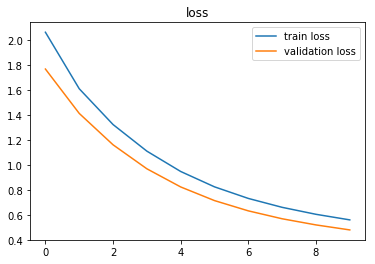

In [20]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('loss')
plt.show()

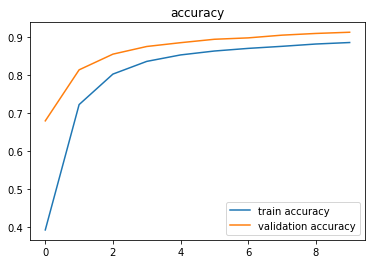

In [21]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('accuracy')
plt.show()

In [22]:
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=0)
print('Test loss:', testLoss)
print('Test accuracy:', testAcc)

Test loss: 0.5252282395362854
Test accuracy: 0.8925999999046326
